# 2. 다항 회귀분석 (Polynomial Regression)
* 다항식을 사용한 선형 회귀
* 제곱근, 이차항, 삼차항 등을 이용하여 항을 여러개로 만듦
* 독립변수의 차수를 높임으로써 단순 선형 모델의 한계를 어느정도 극복할 수 있음

## 2-1. 농어 길이에 따른 무게 예측

### 1) 문제정의
농어 길이에 따른 무게 예측하기

### 2) 데이터 수집
* https://www.kaggle.com/aungpyaeap/fish-market

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ori_data = pd.read_csv('data/02_fish/fish.csv')
ori_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
data = ori_data[ori_data.Species=='Perch'][['Length2', 'Weight']]
data.columns = ['Length', 'Weight']
data

,Length,Weight
72,8.4,5.9
73,13.7,32.0
74,15.0,40.0
75,16.2,51.5
76,17.4,70.0
77,18.0,100.0
78,18.7,78.0
79,19.0,80.0
80,19.6,85.0
81,20.0,85.0


### 3) 데이터 전처리
* 결측치 처리

In [13]:
data.shape

(56, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Length  56 non-null     float64
 1   Weight  56 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [15]:
data.isnull().sum()

Length    0
Weight    0
dtype: int64

### 4) 데이터 탐색
* 상관관계
* 산점도(Scatter Plot)

In [16]:
data.corr()

,Length,Weight
Length,1.000000,0.958656
Weight,0.958656,1.000000


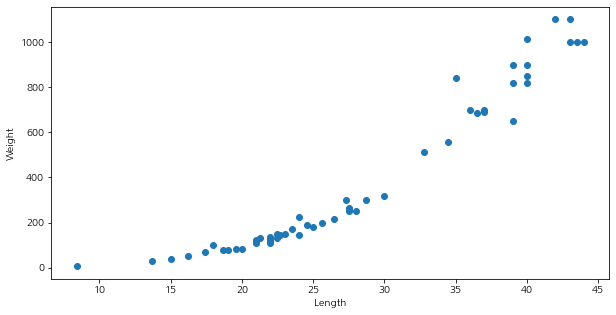

In [17]:
plt.figure(figsize=(10, 5))
plt.xlabel('Length')
plt.ylabel('Weight')
plt.scatter(data.Length, data.Weight)
plt.show()

### 5) 모델 학습
* 데이터 쪼개기
* 선형회귀 학습
* 선형회귀 예측

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
# 입력데이터(독립변수) : Length (2차원)
# 타겟데이터(종속변수) : Weight (1차원)
input_data = data[['Length']].to_numpy()
target_data = data['Weight'].to_numpy()
input_data, target_data

(array([[ 8.4],
        [13.7],
        [15. ],
        [16.2],
        [17.4],
        [18. ],
        [18.7],
        [19. ],
        [19.6],
        [20. ],
        [21. ],
        [21. ],
        [21. ],
        [21.3],
        [22. ],
        [22. ],
        [22. ],
        [22. ],
        [22. ],
        [22.5],
        [22.5],
        [22.7],
        [23. ],
        [23.5],
        [24. ],
        [24. ],
        [24.6],
        [25. ],
        [25.6],
        [26.5],
        [27.3],
        [27.5],
        [27.5],
        [27.5],
        [28. ],
        [28.7],
        [30. ],
        [32.8],
        [34.5],
        [35. ],
        [36.5],
        [36. ],
        [37. ],
        [37. ],
        [39. ],
        [39. ],
        [39. ],
        [40. ],
        [40. ],
        [40. ],
        [40. ],
        [42. ],
        [43. ],
        [43. ],
        [43.5],
        [44. ]]),
 array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
          85. ,   85. ,  110. 

In [23]:
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, test_size=0.25, random_state=0)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42, 1), (14, 1), (42,), (14,))

In [26]:
# LinearRegression : 선형회귀 알고리즘을 구현한 클래스
# fit() : 학습, score() : 평가, predict() : 예측
lr = LinearRegression()

### 단순 선형 회귀 분석

In [27]:
# 선형 회귀 모델 학습
lr.fit(train_input, train_target)

LinearRegression()

In [28]:
lr.coef_, lr.intercept_

(array([37.76648694]), -659.8027258214022)

In [29]:
lr.predict([[33]])

array([586.49134329])

In [30]:
# Weight = a * Length + b
37.76648694 * 33 -659.8027258214022

586.4913431985979

C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


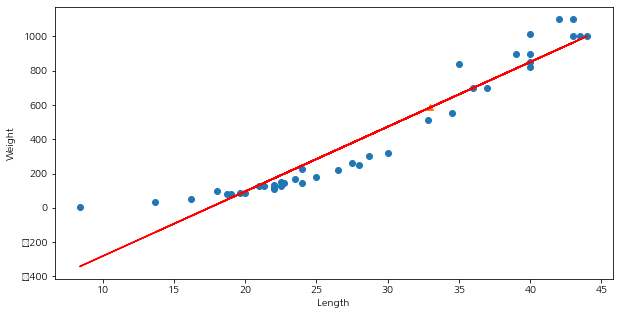

In [31]:
plt.figure(figsize=(10, 5))
plt.xlabel('Length')
plt.ylabel('Weight')
plt.scatter(train_input, train_target)
plt.plot(train_input, lr.predict(train_input), color='r')
plt.scatter(33, 586.4913431985979, marker='^')
plt.show()

In [32]:
### 6) 모델 평가
pred = lr.predict(test_input)
pd.DataFrame({'Length': test_input[:,0], 'Actual Weight': test_target, 'Predicted Weight': pred})

,Lengh,Actual Weight,Predicted Weight
0,39.0,650.0,813.090265
1,27.5,250.0,378.775665
2,36.5,685.0,718.674048
3,24.6,188.0,269.252853
4,21.0,115.0,133.293500
5,15.0,40.0,-93.305422
6,27.5,265.0,378.775665
7,37.0,690.0,737.557291
8,39.0,820.0,813.090265
9,27.3,300.0,371.222368


In [33]:
lr.score(train_input, train_target)

0.922603499955257

In [34]:
lr.score(test_input, test_target)

0.8803680435261592

### 다항회귀

In [37]:
# Length를 제곱한 항 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [38]:
# 선형 회귀 모델 학습
lr.fit(train_poly, train_target)

LinearRegression()

In [39]:
lr.coef_, lr.intercept_

(array([  0.99334411, -20.28904844]), 100.69251536566048)

In [43]:
# 선형 회귀 모델 예측
lr.predict([[50 ** 2, 50]])

array([1569.60036007])

In [45]:
# Weight = a * Length^2 + b * Length + c
x = 50
0.99334411 * x ** 2 -20.28904844 * x + 100.6925153656604

1569.6003683656606

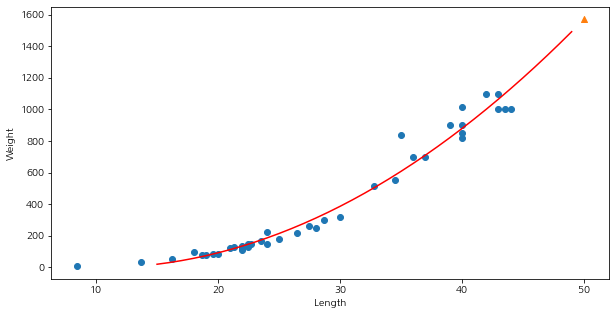

In [46]:
point = np.arange(15, 50)

plt.figure(figsize=(10, 5))
plt.xlabel('Length')
plt.ylabel('Weight')
plt.scatter(train_input, train_target)
plt.plot(point, 0.9933 * point ** 2 -20.289 * point + 100.6925, color='r')
plt.scatter(50, 1569.6003, marker='^')
plt.show()

In [48]:
### 6) 모델 평가
pred = lr.predict(test_poly)
pd.DataFrame({'Length': test_input[:,0], 'Actual Weight': test_target, 'Predicted Weight': pred})

,Length,Actual Weight,Predicted Weight
0,39.0,650.0,820.296012
1,27.5,250.0,293.960164
2,36.5,685.0,683.524933
3,24.6,188.0,202.714043
4,21.0,115.0,112.687249
5,15.0,40.0,19.859213
6,27.5,265.0,293.960164
7,37.0,690.0,709.885805
8,39.0,820.0,820.296012
9,27.3,300.0,287.130922


In [49]:
lr.score(train_poly, train_target)  # 훈련세트

0.9734828103169649

In [50]:
lr.score(test_poly, test_target)  # 테스트 세트

0.9624346725637873

In [51]:
from sklearn import metrics
metrics.r2_score(test_target, pred)

0.9624346725637873

In [52]:
pred2 = lr.predict(train_poly)
metrics.r2_score(train_target, pred2)

0.9734828103169649

In [92]:
# R-Sqaured(결정계수), Adj R-Squared(수정된 결정계수)

### 7) 결과 해석 및 문제해결방안 도출
* R-Squared(결정계수)가 1에 가까우므로 학습이 잘 되었다고 할 수 있음